## 합성곱 신경망

In [1]:
import torch
import torch.nn as nn

### linear
torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)

In [21]:
X_train=torch.tensor([[0,0],
                      [0,1],
                      [1,0],
                      [1,1.]])

In [22]:
X_train.dtype , X_train.shape

(torch.float32, torch.Size([4, 2]))

In [23]:
y_label=torch.tensor([[0],
                      [0],
                      [0],
                      [1]])

In [24]:
y_label.shape

torch.Size([4, 1])

In [25]:
linear =nn.Linear(2,1)
linear(X_train).shape

torch.Size([4, 1])

In [26]:
X_train=torch.rand(32, 2)

In [27]:
linear =nn.Linear(2,1)
linear(X_train).shape

torch.Size([32, 1])

In [28]:
X_train=torch.rand(32, 4)

In [31]:
linear =nn.Linear(4,2)
X=linear(X_train)

In [32]:
linear2=nn.Linear(2,1)
linear2(X).shape

torch.Size([32, 1])

### ReLU

In [35]:
X_train=torch.rand(32, 4)
linear =nn.Linear(4,2)
X=linear(X_train)
relu=nn.ReLU()
X=relu(X)
X

tensor([[0.3270, 0.0000],
        [0.0000, 0.0000],
        [0.0272, 0.0000],
        [0.3612, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.1137, 0.0000],
        [0.3309, 0.1061],
        [0.4942, 0.0000],
        [0.6159, 0.1512],
        [0.2421, 0.0000],
        [0.0573, 0.0000],
        [0.2070, 0.0000],
        [0.0000, 0.0000],
        [0.3113, 0.0644],
        [0.4171, 0.1302],
        [0.2279, 0.0000],
        [0.2553, 0.0000],
        [0.2589, 0.0127],
        [0.1884, 0.0000],
        [0.1583, 0.0000],
        [0.1478, 0.0000],
        [0.4534, 0.1428],
        [0.2090, 0.0055],
        [0.2620, 0.0000],
        [0.3284, 0.0000],
        [0.2362, 0.0000],
        [0.2698, 0.0000],
        [0.2534, 0.0452],
        [0.5659, 0.0950],
        [0.0444, 0.0000]], grad_fn=<ReluBackward0>)

### Softmax
확률 합이 1이다.

In [36]:
linear2 =nn.Linear(2,2)
softmax=nn.Softmax()
softmax(X)


C:\Users\user\anaconda3\envs\torch-book\Lib\site-packages\torch\nn\modules\module.py:1553: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor([[0.5810, 0.4190],
        [0.5000, 0.5000],
        [0.5068, 0.4932],
        [0.5893, 0.4107],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5284, 0.4716],
        [0.5560, 0.4440],
        [0.6211, 0.3789],
        [0.6141, 0.3859],
        [0.5602, 0.4398],
        [0.5143, 0.4857],
        [0.5516, 0.4484],
        [0.5000, 0.5000],
        [0.5614, 0.4386],
        [0.5712, 0.4288],
        [0.5567, 0.4433],
        [0.5635, 0.4365],
        [0.5612, 0.4388],
        [0.5470, 0.4530],
        [0.5395, 0.4605],
        [0.5369, 0.4631],
        [0.5770, 0.4230],
        [0.5507, 0.4493],
        [0.5651, 0.4349],
        [0.5814, 0.4186],
        [0.5588, 0.4412],
        [0.5671, 0.4329],
        [0.5519, 0.4481],
        [0.6156, 0.3844],
        [0.5111, 0.4889]], grad_fn=<SoftmaxBackward0>)

### DropOut

### 5.1 Conv2d
torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)

vgg-16
https://medium.com/nerd-for-tech/vgg-16-easiest-explanation-12453b599526
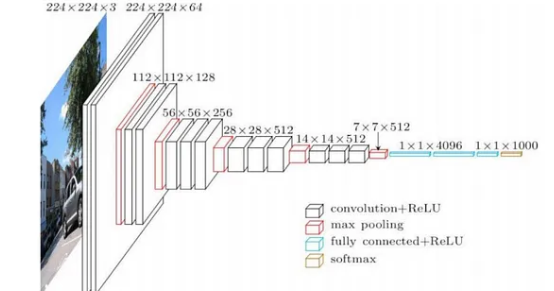

In [53]:
#채널1인 흑백, 흑백사이즈 29x28
image =torch.rand(1,28,28)
image.shape

torch.Size([1, 28, 28])

In [54]:
conv=torch.nn.Conv2d(1,6,3 , padding='same')
print(conv(image).shape) #torch.Size([6, 26, 26]) 채널 갯수, feature 사이즈
x=conv(image)
pool=nn.MaxPool2d(2)
x=pool(x)

torch.Size([6, 28, 28])


In [55]:
conv2=torch.nn.Conv2d(6,16,3 , padding='same')
print(conv2(x).shape)
x=conv2(x)
pool2=nn.MaxPool2d(2)
x=pool2(x)

torch.Size([16, 14, 14])


In [58]:
conv3=torch.nn.Conv2d(16,128,3, padding='same')
x=conv3(x)
x.shape

torch.Size([128, 7, 7])

In [60]:
flatten=nn.Flatten()
x=flatten(x)
x.shape

torch.Size([128, 49])

In [62]:
linear=nn.Linear(49,2)
linear(x).shape

torch.Size([128, 2])

In [2]:
batch_size=64

In [3]:
50000/batch_size

781.25

In [4]:
image =torch.rand(batch_size,1,28,28)
image.shape

torch.Size([64, 1, 28, 28])

In [5]:
conv=nn.Conv2d(1,6,3 , padding='same')

x=conv(image)
pool=nn.MaxPool2d(2)
x=pool(x)
x.shape

torch.Size([64, 6, 14, 14])

In [6]:
conv2=torch.nn.Conv2d(6,16,3 , padding='same')
x=conv2(x)
x.shape

torch.Size([64, 16, 14, 14])

In [7]:
conv3=torch.nn.Conv2d(16,128,3, padding='same')
x=conv3(x)
pool2=nn.MaxPool2d(2)
x=pool2(x)
x.shape

torch.Size([64, 128, 7, 7])

In [8]:
conv4=torch.nn.Conv2d(128,6772,3, padding='same')
x=conv4(x)
x.shape

torch.Size([64, 6772, 7, 7])

In [10]:

# nn.Linear 레이어 정의
linear = nn.Linear(6772 * 7 * 7, 2)  # 6772 * 7 * 7 크기의 입력을 2 크기로 변환

# Flatten
x_flattened = x.view(x.size(0), -1)  # x.size(0) = 배치 크기, -1은 나머지 모든 차원

# Linear Layer에 적용
output = linear(x_flattened)

print(output.shape)  # 출력 형상 확인

torch.Size([64, 2])
